In [ ]:
# %pip install tensorflow-probability==0.15.0

In [1]:
# magic command for automatic reload of python modules without needing to restart the notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sc
import tensorflow as tf
import tensorflow_probability as tfp
tfd=tfp.distributions
tfb=tfp.bijectors
from scipy import io
import time
import matplotlib.pyplot as plt
from sklearn import mixture
import joblib as jbl
import sys
import sklearn
import pandas as pd
from mixture_models import GMCM


# import utils as utl
# from fitter import Fitter
# sys.path.append('C:/Users/tewar/Documents/work/BNAF-master/data/')

In [ ]:
# checking the device specification
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [4]:
# Example learning GMMC on Iris dataset
from sklearn.datasets import load_iris

data=load_iris().data.astype('float32')
nsamps,ndims = data.shape


# data_in = data.astype('float32')
nsamps,ndims = data.shape
print(f'Number of samples = {nsamps}, Number of dimensions = {ndims}')

   
# Training GMCM without data transformation
# Initialing GMCM object
gmcm_obj=GMCM(ndims, data, log_transform_data=False)
ll_no_transform=gmcm_obj.fit_dist(n_comps=2,max_iters=1000)


# Training GMCM with data transformation
# Initialing GMCM object
gmcm_obj=GMCM(ndims, data, log_transform_data=True)
ll_transform=gmcm_obj.fit_dist(n_comps=2,max_iters=1000)

# plots
plt.plot(ll_no_transform)
plt.plot(ll_transform)


Number of samples = 150, Number of dimensions = 4
Learning Marginals


2022-12-15 19:12:17.315868: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-15 19:12:17.315931: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-4-150.ec2.internal): /proc/driver/nvidia/version does not exist
2022-12-15 19:12:17.316614: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Marginals learnt in 2.18 s.
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.
@ Iter:0, Training error: 0.23811277747154236, LogPriors: (5.53, 5.53), Time Elapsed: 4.3 s
@ Iter:100, Training error: -1.8713642358779907, LogPriors: (5.53, 5.53), Time Elapsed: 5.4 s
@ Iter:200, Training error: -1.6491066217422485, LogPriors: (5.53, 5.53), Time Elapsed: 7.5 s
@ Iter:300, Training error: -1.6904958486557007, LogPriors: (5.53, 5.53), Time Elapsed: 9.6 s
@ Iter:400, Training error: -1.8560012578964233, LogPriors: (5.53, 5.53), Time Elapsed: 11.7 s
@ Iter:500, Training error: -2.287461757659912, LogPriors: (5.52, 5.53), Time Elapsed: 13.7 s
@ Iter:600, Training error: -2.4929795265197754, LogPriors: (5.53, 5.53), Time Elapsed: 14.9 s
@ Iter:700, Training error: -2.3293662071228027, LogPriors: (5.53, 5.53), Time Elapsed: 16.1 s
@ Iter:800, Training error: -2.2762603759765625, LogPriors: (5.53, 5.53), Time Elapsed: 17.3 s


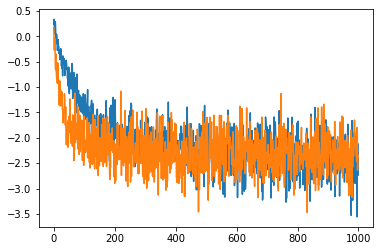

In [5]:
plt.plot(ll_no_transform)
plt.plot(ll_transform)

In [ ]:
sampled=gmcm_obj.distribution.sample(150)

In [ ]:
plt.plot(data[:,0],data[:,3],'ro')
plt.plot(sampled[:,0],sampled[:,3],'ks')

In [ ]:
gmcm_obj.

In [ ]:
# data_set = ['GAS','POWER','HEPMASS']

# from gas import GAS
# from power import POWER
# from hepmass import HEPMASS

from sklearn.datasets import load_iris


n_reps = 1
ll_list = []

for i in range(n_reps):
#     if data_set[i] is 'GAS':
#         gg=GAS('C:/Users/tewar/Documents/work/GMCM/data/gas/ethylene_CO.pickle')
#     elif data[i] is 'POWER':
#         gg=POWER('C:/Users/tewar/Documents/work/GMCM/data/power/data.npy')
#     elif data_set[i] is 'HEPMASS':
#         gg=HEPMASS('C:/Users/tewar/Documents/work/GMCM/data/hepmass/')

#     data = gg.trn.x
    
    data=load_iris().data
    
    nsamps,ndims = data.shape
    np.random.seed(0)
#     idx_selected = np.unique(np.random.randint(0,nsamps,int(nsamps/50)))
#     data_in = data[idx_selected,:].astype('float32')
    
    data_in = data.astype('float32')

    nsamps,ndims = data_in.shape
    print(f'Number of samples = {nsamps}, Number of dimensions = {ndims}')

    min_val = np.min(data_in).astype('float32')-1
    shift_exp_bijec = tfb.Chain([tfb.Shift(shift=min_val.astype('float32')),tfb.Exp()])
    np.random.shuffle(data_in)
    data_in_trn,data_in_tst = np.split(data_in,[int(np.round(nsamps*0.75))])
    
    gmcm_obj = GMCM(ndims, data_in_trn, forward_transform=shift_exp_bijec)
    ll_reg = np.zeros((500,n_reps))
    ll_nonreg = np.zeros((500,n_reps))
    for rep in range(n_reps):
        print(rep)
        ll_reg[:,rep]=gmcm_obj.fit_GMC_dist(10,max_iters=500,batch_size=5,initialization=['random',rep], print_interval=500, regularize=True)
        print(tf.reduce_mean(gmcm_obj.distribution.log_prob(data_in_tst)))
        
        ll_nonreg[:,rep]=gmcm_obj.fit_GMC_dist(10,max_iters=500,batch_size=5,initialization=['random',rep], print_interval=500, regularize=False)
        print(tf.reduce_mean(gmcm_obj.distribution.log_prob(data_in_tst)))
    ll_list.append([ll_reg,ll_nonreg])

# jbl.dump(ll_list,'regularization_impact')

In [ ]:
ll_reg[:,0]

In [ ]:
from power import POWER
gg=POWER('C:/Users/tewar/Documents/work/GMCM/data/power/data.npy')
data = gg.trn.x
nsamps,ndims = data.shape
idx_selected = np.unique(np.random.randint(0,nsamps,int(nsamps/50)))
data_in = data[idx_selected,:].astype('float32')
# data_in = np.random.randn(1000,10).astype('float32')
min_val = np.min(data_in).astype('float32')-1
shift_exp_bijec = tfb.Chain([tfb.Shift(shift=min_val.astype('float32')),tfb.Exp()])
gmcm_obj = GMCM(ndims, data_in, forward_transform=shift_exp_bijec)
ll_trn=gmcm_obj.fit_GMC_dist(5,max_iters=5,batch_size=50,initialization=['random',1], print_interval=500, regularize=True)

In [ ]:
dl,vals = [0, 2, 3, 5], [0.1, -2, 1.2, 3.4]
marg_gmcm = gmcm_obj.get_marginal(dl)
cond_gmcm = gmcm_obj.get_conditional(dl,vals)

In [ ]:
vv_all = np.array([0.1, 0, -2, 1.2, 0, 3.4]).astype('float32').reshape(1,-1)
vv_obs = np.array(vals).astype('float32').reshape(1,-1)
vv_unobs = np.array([0.,0.]).astype('float32').reshape(1,-1)
print(gmcm_obj.distribution.log_prob(vv_all) - marg_gmcm.distribution.log_prob(vv_obs))
print(cond_gmcm.distribution.log_prob(vv_unobs))

In [ ]:
out1 = vec2gmm_params(gmcm_obj.ndims,gmcm_obj.ncomps,gmcm_obj.gmc.params)
out2 = vec2gmm_params(marg_gmcm.ndims, marg_gmcm.ncomps,marg_gmcm.gmc.params)
out3 = vec2gmm_params(cond_gmcm.ndims, cond_gmcm.ncomps,cond_gmcm.gmc.params)


print(tf.math.softmax(out1[0]))
print(tf.math.softmax(out2[0]))
print(tf.math.softmax(out3[0]))



In [ ]:
data1 = gmcm_obj.distribution.sample(10000)
data2 = marg_gmcm.distribution.sample(10000)


In [ ]:
vv =np.array([1,1.,1]).astype('float32').reshape(1,-1)
vv1 = marg_gmcm.distribution.bijector.inverse(vv)
print(vv1)
vv2 = marg_gmcm.distribution.distribution.bijector.inverse(vv1)
print(vv2)
vv3 = marg_gmcm.distribution.distribution.distribution.bijector.inverse(vv2)
print(vv3)

obj = marg_gmcm
while hasattr(obj.distribution,'bijector'):
    vv = obj.distribution.bijector.inverse(vv).numpy()
    print(vv)
    obj = obj.distribution
    




In [ ]:
plt.plot(data1[:,3],data1[:,0],'k.');
plt.plot(data2[:,1],data2[:,0],'r.');

In [ ]:
plt.semilogy(ll_trn+10)

In [ ]:
plt.plot(ll_1)
np.mean(ll_1)

In [ ]:
gmcm_obj.gmc.total_trainable_params

In [ ]:
data_in_tst.shape

In [ ]:
ss = gmcm_obj.distribution.sample(2000).numpy()

In [ ]:
id1,id2 = np.random.choice(ndims,2)
plt.subplot(121)
plt.plot(ss[:,id1],ss[:,id2],'k.')
plt.subplot(122)
plt.plot(data_in[:,id1],data_in[:,id2],'k.')
print([id1,id2])

In [ ]:
# plt.hist(ss[:,id2],20);
plt.hist(data_in[:,id2],50)

In [ ]:
plt.hist(np.log(data_in[:,1]+1),50);

In [ ]:
sys.path.append('../logs/GAS/LRminus3_NComps60/chkpt/')


In [ ]:
@tf.function
def run_chain(init_state,step_size,target_log_prob_fn, unconstraining_bijectors=tfb.Identity(),num_steps=1000,burnin=50):
    def trace_fn(_,pkr):
        return (
            pkr.inner_results.inner_results.target_log_prob,
            pkr.inner_results.inner_results.leapfrogs_taken,
            pkr.inner_results.inner_results.has_divergence,
            pkr.inner_results.inner_results.energy,
            pkr.inner_results.inner_results.log_accept_ratio
                )
#     kernel = tfp.mcmc.TransformedTransitionKernel(
#         inner_kernel=tfp.mcmc.NoUTurnSampler(
#             target_log_prob_fn,
#             step_size=step_size),
#         bijector=unconstraining_bijectors)

#     hmc = tfp.mcmc.DualAveragingStepSizeAdaptation(
#         inner_kernel=kernel,
#         num_adaptation_steps=burnin,
#         step_size_setter_fn=lambda pkr, new_step_size: pkr._replace(
#               inner_results=pkr.inner_results._replace(step_size=new_step_size)),
#         step_size_getter_fn=lambda pkr: pkr.inner_results.step_size,
#         log_accept_prob_getter_fn=lambda pkr: pkr.inner_results.log_accept_ratio
#       )
    
    
    hmc = tfp.mcmc.TransformedTransitionKernel(
        inner_kernel=tfp.mcmc.RandomWalkMetropolis(target_log_prob_fn),
        bijector=unconstraining_bijectors) 
    
    

    # Sampling from the chain.
    return tfp.mcmc.sample_chain(
        num_results=num_steps,
        num_burnin_steps=burnin,
        current_state=init_state,
        kernel=hmc)
#         trace_fn=trace_fn)


In [ ]:
aa=np.load('../logs/GAS/LRminus3_NComps60/chkpt/iter10000.npy')

In [ ]:
plt.plot(aa)
aa[-1]

In [ ]:
alpha = [0.1,0.2,0.7]
mu = np.random.randn(3,2).astype('float32')
sig = np.zeros((3,2,2)).astype('float32')
sig[0] = tfb.FillScaleTriL(diag_bijector=tfb.Exp()).forward(np.random.randn(3).astype('float32'))
sig[1] = tfb.FillScaleTriL(diag_bijector=tfb.Exp()).forward(np.random.randn(3).astype('float32'))
sig[2] = tfb.FillScaleTriL(diag_bijector=tfb.Exp()).forward(np.random.randn(3).astype('float32'))
dist=tfd.MixtureSameFamily(mixture_distribution=tfd.Categorical(probs=alpha),
                          components_distribution=tfd.MultivariateNormalTriL(loc=mu,scale_tril=sig))
ss = dist.sample(10000).numpy()
tf.reduce_mean(dist.log_prob(ss))

In [ ]:
gmcm_obj = GMCM(2, ss)
ll_trn=gmcm_obj.fit_GMC_dist(2,max_iters=5000,batch_size=50,initialization=['random',0], print_interval=500, regularize=True)

In [ ]:
plt.plot(ll_trn)
tf.reduce_mean(gmcm_obj.distribution.log_prob(ss))

In [ ]:
gmcm_obj.gmc.distribution.log_prob(np.array([0.3,0.1]).astype('float32').reshape(1,-1))

def target_log_prob(u_part):
    u = tf.concat([u_part,tf.constant(0.999999,shape=(1,))],axis=0)
    u = tf.reshape(u,shape=(1,-1))
    return gmcm_obj.gmc.distribution.log_prob(u)

init_state = tf.constant(np.random.rand(1).astype('float32'))
target_log_prob(init_state)

In [ ]:
# init_state = tf.constant(np.random.rand(2).astype('float32'))
u_init = tf.Variable(init_state)
with tf.GradientTape() as tape:
    out = target_log_prob(u_init)
grads = tape.gradient(out, u_init)
print(out)
print(grads)

grad_fd = gradientFiniteDifferent(target_log_prob,u_init,delta=1E-4)
print(grad_fd)

In [ ]:
# Running 5 chains in parallel
n_chains = 5
init_state = tf.constant(np.random.rand(2).astype('float32'))
step_size= 0.1
# bijector to map contrained parameters to real
ts = time.time()
output_NUTS = run_chain(init_state, step_size, target_log_prob,num_steps=10,burnin=50)
print(f'NUTS runtime for {n_chains} chains: {time.time()-ts} s.')

In [ ]:
ess = tfp.mcmc.effective_sample_size(output_NUTS.all_states)
ess = tfp.transpose(ess).numpy()
plot(ess)
total_samples_all_chains = np.prod(output_NUTS.all_states.shape[:2])
total_samples = tf.reshape(output_NUTS.all_states,shape=(total_samples_all_chains,2))

In [ ]:
output_NUTS.all_states

In [ ]:
u_vec = np.linspace(0.001,0.9999,50).astype('float32').reshape(-1,1)
p_vec = np.zeros(50)
for i in range(50):
    p_vec[i] = target_log_prob(u_vec[i])
    if i%10 ==0:
        print(i)


In [ ]:
plt.plot(u_vec,tf.exp(p_vec),'k')

In [ ]:
# # Numerically finding the icdf values for a distribution whos analytical CDF is specified
# def icdf_numerical(u,cdf_funct,lb,ub):
#     # setting up the numerical method (Chandrupatla root finding algorithm) to find icdf
#     obj_func = lambda x: cdf_funct(x) - u
#     # finding the roots
#     x = tfp.math.find_root_chandrupatla(obj_func,low=lb,high=ub)[0]
#     return x

# # Standardize GMM parameters
# def standardize_gmm_params(alphas,mus,covs):
#     weighted_mus = tf.linalg.matvec(tf.transpose(mus),alphas)
#     new_mus = mus - weighted_mus
#     variances = tf.linalg.diag_part(covs)
#     scaling_vec = tf.linalg.matvec(tf.transpose(new_mus**2+variances),alphas)
#     scaling_matrix = tf.linalg.diag(1/(scaling_vec**0.5))
#     new_mus = tf.linalg.matmul(new_mus,scaling_matrix)
#     new_covs = tf.linalg.matmul(covs,scaling_matrix**2)
#     return alphas,new_mus,new_covs

# def vec2gmm_params(n_dims,n_comps,param_vec):
#     num_alpha_params = n_comps
#     num_mu_params = n_comps*n_dims
#     num_sig_params = int(n_comps*n_dims*(n_dims+1)*0.5)
#     logit_param, mu_param, chol_param = tf.split(param_vec,[num_alpha_params,num_mu_params,num_sig_params])
#     mu_vectors = tf.reshape(mu_param, shape=(n_comps,n_dims))
#     chol_mat_array=tf.TensorArray(tf.float32,size=n_comps)
#     cov_mat_array=tf.TensorArray(tf.float32,size=n_comps)
#     for k in range(n_comps):
#         start_idx = tf.cast(k*(num_sig_params/n_comps),tf.int32)
#         end_idx = tf.cast((k+1)*(num_sig_params/n_comps),tf.int32)
#         chol_mat = tfb.FillScaleTriL(diag_bijector=tfb.Exp()).forward(chol_param[start_idx:end_idx])
#         cov_mat = tf.matmul(chol_mat,tf.transpose(chol_mat))
#         chol_mat_array = chol_mat_array.write(k,chol_mat) 
#         cov_mat_array =  cov_mat_array.write(k,cov_mat) 
        
#     chol_matrices = chol_mat_array.stack()
#     cov_matrices = cov_mat_array.stack()     
#     return [logit_param,mu_vectors,cov_matrices,chol_matrices]

# def gmm_params2vec(n_dims,n_comps,alphas,mu_vectors,cov_matrices):
#     # now gathering all the parameters into a single vector
#     param_list = []
#     param_list.append(np.log(alphas))
#     param_list.append(tf.reshape(mu_vectors,-1))
#     for k in range(n_comps):
#         chol_mat = tf.linalg.cholesky(cov_matrices[k])
#         param_list.append(tfb.FillScaleTriL(diag_bijector=tfb.Exp()).inverse(chol_mat))
#     param_vec = tf.concat(param_list,axis=0)
#     return param_vec

In [ ]:
# # GMC bijector
# class GMC_bijector(tfb.Bijector):
#     def __init__(self,n_dims,n_comps,param_list,forward_min_event_ndims=1, validate_args: bool = False,name="gmc"):
#         super(GMC_bijector, self).__init__(
#             validate_args=validate_args, forward_min_event_ndims=forward_min_event_ndims, name=name
#         )
        
#         assert (len(param_list)==3), 'incorrect number of inputs'
#         assert param_list[1].shape == [n_comps,n_dims], 'the dimension of mean vectors should be ncomps x ndims'
#         assert param_list[2].shape == [n_comps,n_dims], 'the dimension of variance vectors should be ncomps x ndims'
        
#         self.ndims = n_dims
#         self.ncomps = n_comps
#         self.logits = param_list[0]
#         self.mu_vectors = param_list[1]
#         self.var_vectors = param_list[2]
#         self.std_vectors = self.var_vectors**0.5
    
#     def _forward(self, x_mat):
#         assert x_mat.shape[1] == self.ndims, 'expected data dimensions n_samps x n_dims'
#         dist = tfd.MixtureSameFamily(mixture_distribution=tfd.Categorical(logits=self.logits),
#                                components_distribution=tfd.Normal(loc=tf.transpose(self.mu_vectors),
#                                                                   scale=tf.transpose(self.std_vectors)))
#         u_mat = dist.cdf(x_mat)
#         return u_mat
    
#     def _inverse(self, u_mat):
#         assert u_mat.shape[1] == self.ndims, 'expected data dimensions n_samps x n_dims'
#         x_mat = self.gmm_icdf_parallel(u_mat,self.logits,tf.transpose(self.mu_vectors),tf.transpose(self.std_vectors))
#         return x_mat
    
#     def _inverse_log_det_jacobian(self, u_mat):
#         x_mat = self._inverse(u_mat)
#         dist = tfd.MixtureSameFamily(mixture_distribution=tfd.Categorical(logits=self.logits),
#                                components_distribution=tfd.Normal(loc=tf.transpose(self.mu_vectors),
#                                                                   scale=tf.transpose(self.std_vectors)))
#         log_det_J_mat = dist.log_prob(x_mat)
#         return -tf.reduce_sum(log_det_J_mat,axis=1)    
    
#     # Numerically finding the icdf values of univariate gmm distributions (one along each dimension)
#     @tf.custom_gradient
#     def gmm_icdf_parallel(self,u_mat,logit,mu_T,std_T):
#         # Setting up the numerical method to find icdf
#         # first define a function that computes the residual between the actual true CDF values and the CDF value as specified matrix
#         obj_func = lambda x: tfd.MixtureSameFamily(mixture_distribution=tfd.Categorical(logits=logit),
#                                                    components_distribution=tfd.Normal(loc=mu_T,scale=std_T)).cdf(x)-u_mat
#         # specifying the lower and upper bounds of the root based on current parameters
#         lb = tf.reduce_min(mu_T,axis=1) - 5*tf.reduce_max(std_T,axis=1)
#         ub = tf.reduce_max(mu_T,axis=1) + 5*tf.reduce_max(std_T,axis=1)
#         # replicating the lower and upper bounds
#         lb = tf.repeat(tf.reshape(lb,[1,-1]),u_mat.shape[0],axis=0)
#         ub = tf.repeat(tf.reshape(ub,[1,-1]),u_mat.shape[0],axis=0)
#         # finding the roots (Chandrupatla root finding algorithm)
#         x_mat = tfp.math.find_root_chandrupatla(obj_func,low=lb,high=ub)[0]
#         # following code implements custom gradient
#         def grad(dy):
#             # Calling  another python function to get the partial derivatives
#             grad_logit, grad_mu, grad_std = self.partial_deriv_z(x_mat,logit,mu_T,std_T)

#             temp_mat = tf.linalg.matmul(grad_logit,dy)

#             logit_grad = tf.linalg.diag_part(temp_mat)
#             logit_grad = tf.reduce_sum(logit_grad,axis=1)

#             temp_mat = tf.linalg.matmul(grad_mu,dy)
#             mu_grad = tf.linalg.diag_part(temp_mat)

#             temp_mat = tf.linalg.matmul(grad_std,dy)
#             std_grad = tf.linalg.diag_part(temp_mat)
            
#             return tf.constant(0.,shape=(u_mat.shape)), logit_grad, tf.transpose(mu_grad), tf.transpose(std_grad)    
#         return x_mat, grad
    
#     # Analytical partial derivative of icdf of Gaussian Mixture marginals
#     def partial_deriv_z(self,z,logit,mu_T,std_T):
#         alpha = tf.math.softmax(logit)
#         grad_logit_array = tf.TensorArray(tf.float32, size=self.ncomps)
#         grad_mu_array = tf.TensorArray(tf.float32, size=self.ncomps)
#         grad_var_array = tf.TensorArray(tf.float32, size=self.ncomps)        
#         dist = tfd.MixtureSameFamily(mixture_distribution=tfd.Categorical(logits=logit),
#                                 components_distribution=tfd.Normal(loc=mu_T,
#                                                                    scale=std_T))
#         common_factor1 = dist.prob(z)
#         for k in range(self.ncomps):        
#             common_factor2 = tfd.Normal(loc=mu_T[:,k],scale=std_T[:,k]).prob(z)
#             term = 0.5*(1+tf.math.erf((z-mu_T[:,k])/(tf.math.sqrt(2.)*std_T[:,k])))
#             v1 = -alpha[k]*(term - dist.cdf(z))/common_factor1
#             v2 = alpha[k]*common_factor2/common_factor1
#             v3 = v2 * ((z-mu_T[:,k])/(std_T[:,k])) 

#             grad_logit_array = grad_logit_array.write(k, tf.transpose(v1) )
#             grad_mu_array = grad_mu_array.write(k, tf.transpose(v2) )
#             grad_var_array = grad_var_array.write(k, tf.transpose(v3) )
#         return grad_logit_array.stack(), grad_mu_array.stack(), grad_var_array.stack()
    
#  # Marignal transform bijector
# class Marginal_transform(tfb.Bijector):
#     def __init__(self,ndims,marg_dist_list,forward_min_event_ndims=1, validate_args: bool = False,name="marginals"):
#         super(Marginal_transform, self).__init__(
#             validate_args=validate_args, forward_min_event_ndims=forward_min_event_ndims, name=name
#         )
#         self.ndims = ndims
#         self.marg_dists = marg_dist_list
    
#     def _inverse(self, x_mat):
#         nobs = x_mat.get_shape().as_list()[0]
#         temp_array = tf.TensorArray(tf.float32,size=self.ndims)
#         for j in range(self.ndims):
#             u_cur = self.marg_dists[j]['cdf'](x_mat[:,j])
#             temp_array = temp_array.write(j,u_cur)
#         u_mat = tf.transpose(temp_array.stack())            
#         return u_mat
    
#     def _forward(self, u_mat):
#         temp_array = tf.TensorArray(tf.float32,size=self.ndims)
#         for j in range(self.ndims):
#             x_cur = icdf_numerical(u_mat[:,j], self.marg_dists[j]['cdf'],self.marg_dists[j]['lb'],self.marg_dists[j]['ub'])
#             temp_array = temp_array.write(j,x_cur)
#         x_mat = tf.transpose(temp_array.stack())              
#         return x_mat
    
#     def _forward_log_det_jacobian(self, u_mat):
#         x_mat = self._forward(u_mat)
#         temp_array = tf.TensorArray(tf.float32,size=self.ndims)
#         for j in range(self.ndims):
#             temp_array = temp_array.write(j,self.marg_dists[j]['log_pdf'](x_mat[:,j]))
#         log_det_J_mat = tf.transpose(temp_array.stack())
#         return -tf.reduce_sum(log_det_J_mat,axis=1) 
    
#     def _inverse_log_det_jacobian(self, x_mat):
#         u_mat = self._inverse(x_mat)
#         return -self._forward_log_det_jacobian(u_mat)   


In [ ]:

# # Defining GMC class
# class GMC:
#     def __init__(self, n_dims, n_comps, param_vec):        
#         self.ndims = n_dims
#         self.ncomps = n_comps   
#         self.total_trainable_params = int(n_comps*(1+n_dims+0.5*n_dims*(n_dims+1)))
#         self.params = param_vec
#         assert tf.size(param_vec) == self.total_trainable_params, 'the supplied parameter vector is not commensurate with the n_dims, and n_comps'
        
#     @property
#     def distribution(self):
#         # transforming vector in to parameters
#         logits,mus,covs,chols = vec2gmm_params(self.ndims,self.ncomps,self.params)
#         # Instantiating the bijector
#         gmc_bijector = GMC_bijector(self.ndims, self.ncomps, [logits, mus, tf.linalg.diag_part(covs)])
#         # Specifying the base distribution
#         base_dist = tfd.MixtureSameFamily(tfd.Categorical(logits=logits),
#                                           tfd.MultivariateNormalTriL(loc=mus,scale_tril=chols))
#         # Instnatiating the gmc distribution as a transformed distribtution
#         gmc_dist = tfd.TransformedDistribution(distribution=base_dist,bijector=gmc_bijector)    
#         return gmc_dist   
    
#     @property
#     def identifiability_prior(self):
#         # transforming vector in to parameters
#         logits,mus,covs,_ = vec2gmm_params(self.ndims,self.ncomps,self.params)        
#         alphas = tf.math.softmax(logits)
#         variances = tf.linalg.diag_part(covs)        
#         vec1 = tf.linalg.matvec(tf.transpose(mus),alphas)
#         vec2 = tf.linalg.matvec(tf.transpose(variances + mus**2),alphas)
#         log_prior_1 = tfd.MultivariateNormalDiag(loc=tf.zeros(self.ndims),scale_diag=1E-1*tf.ones(self.ndims)).log_prob(vec1)
#         log_prior_2 = tfd.MultivariateNormalDiag(loc=tf.ones(self.ndims) ,scale_diag=1E-1*tf.ones(self.ndims)).log_prob(vec2)
#         return log_prior_1,log_prior_2
    

    
# class GMCM:
#     def __init__(self, n_dims, data_in, forward_transform=None, marginals_list=None, gmc=None):
        
#         self.ndims = n_dims
#         self.data_transform = forward_transform
#         self.gmc = gmc
#         if gmc is not None:
#             self.ncomps = gmc.ncomps
        
#         if forward_transform is not None:
#             data_in = forward_transform.inverse(data_in).numpy()
#         self.data_in = data_in
        
#         if marginals_list is None:
#             print('Learning Marginals')
#             ts = time.time()
#             marginals_list = self.learn_marginals()
#             print(f'Marginals learnt in {np.round(time.time()-ts,2)} s.') 
        
#         self.marg_dists = marginals_list
#         self.marg_bijector = Marginal_transform(self.ndims,self.marg_dists)       
        
#     @property
#     def distribution(self):
#         # setting the gmcm distribution as a transformed distribution of gmc_distribution
#         gmcm_dist = tfd.TransformedDistribution(distribution=self.gmc.distribution,bijector=self.marg_bijector)
#         if self.data_transform is not None:
#             gmcm_dist = tfd.TransformedDistribution(distribution=gmcm_dist,bijector=self.data_transform)
#         return gmcm_dist
    
    
#     def learn_marginals(self):
#         # fitting marginal distributions first
#         marg_dist_list=[]
#         for j in range(self.ndims):
#             input_vector = self.data_in[:,j].reshape(-1,1)
#             marg_gmm_obj = GMM_best_fit(input_vector,max_ncomp=10)
#             marg_gmm_tfp = tfd.MixtureSameFamily(mixture_distribution=tfd.Categorical(probs=marg_gmm_obj.weights_.flatten().astype('float32')),
#                                                 components_distribution=tfd.Normal(loc=marg_gmm_obj.means_.flatten().astype('float32'),
#                                                                                    scale = marg_gmm_obj.covariances_.flatten().astype('float32')**0.5),)
            
#             # creating a dictionary containing necessary information about each marginal distribution
#             info_dict={'cdf':marg_gmm_tfp.cdf,
#                        'log_pdf':marg_gmm_tfp.log_prob,
#                        'lb':tf.reduce_min(input_vector)-3*tfp.stats.stddev(input_vector),
#                        'ub':tf.reduce_max(input_vector)+3*tfp.stats.stddev(input_vector)                         
#                       }
            
#             marg_dist_list.append(info_dict)
        
#         return marg_dist_list
        
#     def init_GMC_params(self,initialization=['random',None]):
#         # Initializing the GMC params 
#         init_method, seed_val = initialization
#         if init_method == 'random':
#             if seed_val is not None:
#                 np.random.seed(seed_val)
#             alphas = tf.ones(self.ncomps)/self.ncomps
#             mus = tf.constant(np.random.randn(self.ncomps,self.ndims).astype('float32'))
#             covs = tf.repeat(tf.expand_dims(tf.eye(self.ndims),0),self.ncomps,axis=0)
#         elif init_method == 'gmm':            
#             gmm = mixture.GaussianMixture(n_components=self.ncomps,covariance_type='full',max_iter=1000,n_init=5)
#             gmm.fit(self.data_in)
#             alphas = gmm.weights_.astype('float32')
#             mus = gmm.means_.astype('float32')
#             covs = gmm.covariances_.astype('float32')                                                            
        
#         # changing the parameters to standardize the resulting gmm
#         alphas,mus,covs = standardize_gmm_params(alphas,mus,covs)
#         # now initializing trainable parameters
#         init_params = tf.Variable(gmm_params2vec(self.ndims,self.ncomps,alphas,mus,covs))
        
#         return init_params
    
    
#     def fit_GMC_dist(self, n_comps, optimizer = tf.optimizers.Adam(learning_rate=1E-2), initialization = ['random',None], max_iters = 1000, batch_size = 10, print_interval=100, regularize=True, plot_results = False):
#         self.ncomps = n_comps
#         # getting the marginal CDF values
#         u_mat = self.marg_bijector.inverse(self.data_in)
#         # initializing the parameters
#         gmc_params = self.init_GMC_params(initialization=initialization)
#         # instantiation GMC object
#         gmc_obj = GMC(self.ndims,self.ncomps,gmc_params)
        
#         # Defining the training step
#         @tf.function
#         def train_step(u_selected):
#             with tf.GradientTape() as tape:
#                 neg_gmc_ll = -tf.reduce_mean(gmc_obj.distribution.log_prob(u_selected))
#                 ident_prior = gmc_obj.identifiability_prior
#                 if regularize:
#                     total_cost = neg_gmc_ll - tf.reduce_sum(ident_prior)
#                 else:
#                     total_cost = neg_gmc_ll
                    
#             grads = tape.gradient(total_cost, gmc_obj.params)
#             if not (tf.reduce_any(tf.math.is_nan(grads)) or tf.reduce_any(tf.math.is_inf(grads))):
#                 optimizer.apply_gradients(zip([grads], [gmc_obj.params])) #updating the gmc parameters
#             return neg_gmc_ll,ident_prior[0],ident_prior[1]

#         neg_ll_trn = np.empty(max_iters)  
#         neg_ll_trn[:] = np.NaN
#         neg_prior_1 = np.empty(max_iters)  
#         neg_prior_1[:] = np.NaN
#         neg_prior_2 = np.empty(max_iters)  
#         neg_prior_2[:] = np.NaN
#         np.random.seed(10)
#         ts = time.time() # start time
#         # Optimization iterations
#         for itr in np.arange(max_iters):
#             np.random.seed(itr)
#             # Executing a training step
#             samps_idx = np.random.choice(u_mat.shape[0],batch_size)
#             u_selected_trn = tf.gather(u_mat,samps_idx)
#             out = train_step(u_selected_trn)
#             neg_ll_trn[itr] = out[0].numpy()
#             neg_prior_1[itr] = out[1].numpy()
#             neg_prior_2[itr] = out[2].numpy()    
#             # Printing results every 100 iteration    
#             if tf.equal(itr%print_interval,0) or tf.equal(itr,0):
#                 time_elapsed = np.round(time.time()-ts,1)
#                 print(f'@ Iter:{itr}, Training error: {neg_ll_trn[itr]}, LogPriors: {np.round(neg_prior_1[itr],2), np.round(neg_prior_2[itr],2)}, Time Elapsed: {time_elapsed} s')    
        
#         if plot_results:
#             # Plotting results
#             plt.plot(neg_ll_trn)
#             plt.xlabel('Iteration',fontsize=12)
#             plt.ylabel('Neg_logLike',fontsize=12)
#             plt.legend(['train'],fontsize=12)
        
#         # setting gmc distritbution embedded inside GMCM
#         self.gmc = gmc_obj
         
#         return neg_ll_trn
    
#     def get_marginal(self,dim_list):        
#         data_in_new = tf.gather(self.data_in,dim_list,axis=1).numpy()
#         logits,mus,covs,_ = vec2gmm_params(self.ndims,self.ncomps,self.gmc.params)
#         alphas = tf.math.softmax(logits)
#         dim_remove = list(set(list(range(self.ndims)))-set(dim_list))
#         mus_new = tf.gather(mus, dim_list, axis=1)
#         covs_new = tf.TensorArray(tf.float32,self.ncomps)
#         for k in range(self.ncomps):
#             temp_mat = covs[k].numpy()
#             covs_new = covs_new.write(k,temp_mat[np.ix_(dim_list,dim_list)])
#         covs_new = covs_new.stack()
#         # getting the gmc object first for the marginal gmcm
#         marginal_gmc_params = gmm_params2vec(len(dim_list),self.ncomps,alphas,mus_new,covs_new)
#         marg_gmc = GMC(len(dim_list),self.ncomps,marginal_gmc_params)
#         # then getting the marginals along the specified dimensions
#         marg_list_new = []
#         for j in range(self.ndims):
#             if j in dim_list:
#                 marg_list_new.append(self.marg_dists[j])
#         # creating the marginal gmcm object
#         marg_gmcm_dist = GMCM(len(dim_list), data_in_new, forward_transform=self.data_transform, marginals_list=marg_list_new, gmc=marg_gmc)
#         return marg_gmcm_dist   
    
#     def get_conditional(self,obs_dim_list, value_list):
        
#         x_obs = np.array(value_list).reshape(1,-1).astype('float32')
#         unobs_dim_list = list(set(range(self.ndims)) - set(obs_dim_list))
        
#         #Obtaining the marginal distribution for the observed and missing part
#         gmcm_observed = self.get_marginal(obs_dim_list)
#         gmcm_unobserved = self.get_marginal(unobs_dim_list)
        
#         temp_obj = gmcm_observed
#         z_obs = np.copy(x_obs)
#         while hasattr(temp_obj.distribution,'bijector'):
#             z_obs = temp_obj.distribution.bijector.inverse(z_obs).numpy()
#             temp_obj = temp_obj.distribution

#         #Obtaining the conditional mu and Sigma of individual compoents of the missing part given the data of observed part
#         mus_cond = np.zeros((self.ncomps,len(unobs_dim_list))).astype('float32')
#         covs_cond = np.zeros((self.ncomps,len(unobs_dim_list), len(unobs_dim_list))).astype('float32')
#         logits_cond = np.zeros(self.ncomps).astype('float32')
        
#         logits,mus,covs,_ = vec2gmm_params(self.ndims,self.ncomps,self.gmc.params)
#         logits_unobs,mus_unobs,covs_unobs,_ = vec2gmm_params(gmcm_unobserved.ndims,gmcm_unobserved.ncomps,gmcm_unobserved.gmc.params)
#         logits_obs,mus_obs,covs_obs,_ = vec2gmm_params(gmcm_observed.ndims,gmcm_observed.ncomps,gmcm_observed.gmc.params)
        
#         for k in range(self.ncomps):
#             sig_11 = covs_unobs.numpy()[k]
#             sig_22 = covs_obs.numpy()[k]
#             sig_12 = covs.numpy()[k][np.ix_(unobs_dim_list,obs_dim_list)]
#             sig_21 = sig_12.T
#             mu_11 = mus_unobs[k,:]
#             mu_22 = mus_obs[k,:]
            
# #             temp_mat1 = np.concatenate([np.concatenate([sig_11,sig_12],axis=1),np.concatenate([sig_21,sig_22],axis=1)],axis=0)
# #             temp_mat2=covs.numpy()[k]
# #             lll = unobs_dim_list+obs_dim_list
# #             temp_mat2 = temp_mat2[:,lll]
# #             temp_mat2 = temp_mat2[lll,:]
# #             print(temp_mat1-temp_mat2)
            

#             # Getting the conditional mu and Sigma
#             mu_bar = mu_11 + np.matmul(sig_12,  np.linalg.solve(sig_22,z_obs.T)).flatten()
#             sig_bar = sig_11 - np.matmul(sig_12,  np.linalg.solve(sig_22,sig_21))
#             mus_cond[k] = mu_bar
#             covs_cond[k] = (sig_bar+sig_bar.T)/2

#             # Getting the log proability of the components conditioned on the observed data
#             logits_cond[k] = logits_obs[k] + tfd.MultivariateNormalFullCovariance(loc=mus_obs[k],
#                                                                                          covariance_matrix=covs_obs[k]).log_prob(z_obs)
#         #logits to probabilities
#         alphas_cond = tf.math.softmax(logits_cond)
#         # parameter vector of the conditional gmc distribution
#         conditional_gmc_params = gmm_params2vec(len(unobs_dim_list),self.ncomps,alphas_cond,mus_cond,covs_cond)
#         cond_gmc = GMC(len(unobs_dim_list),self.ncomps,conditional_gmc_params)
#         # then getting the marginals along the specified dimensions
#         marg_list_new = []
#         for j in range(self.ndims):
#             if j in unobs_dim_list:
#                 marg_list_new.append(self.marg_dists[j])
#         # creating the conditional gmcm object
#         data_in_new = tf.gather(self.data_in,unobs_dim_list,axis=1).numpy()
#         cond_gmcm_dist = GMCM(len(unobs_dim_list), data_in_new, forward_transform=self.data_transform, marginals_list=marg_list_new, gmc=cond_gmc)
#         return cond_gmcm_dist  
        